# Integración Numérica con el Método de Monte Carlo

## Introducción

La integración numérica es una herramienta clave en ciencia e ingeniería, especialmente cuando las soluciones analíticas no son factibles. Este proyecto implementa el método de Monte Carlo para calcular la integral definida de una función f(x) en un intervalo [a, b], comparando un enfoque iterativo con uno vectorizado para evaluar su eficiencia y precisión.

## Objetivo del Proyecto

Implementar un algoritmo de integración numérica utilizando el método de Monte Carlo en dos versiones: una iterativa y otra vectorizada. El propósito es comparar ambas implementaciones en términos de precisión y eficiencia, validando los resultados con la función `scipy.integrate.quad`.

## Descripción del Método de Monte Carlo

El método consiste en generar puntos aleatorios dentro de un rectángulo que contiene el área bajo la curva de la función. La integral se aproxima calculando la proporción de puntos que caen debajo de la curva. La fórmula es:

$$
I \approx \frac{N_{\text{debajo}}}{N_{\text{total}}} \times (b - a) \times M
$$

Donde:
-  $N_{debajo}$ es el número de puntos que caen por debajo de la curva.
-  $N_{total}$ es el número total de puntos generados.
-  $(b - a)$ es el ancho del intervalo de integración.
-  $M$ es el valor máximo de la función en el intervalo.

## Implementación

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.optimize import minimize_scalar
import timeit

### 1. Versión Iterativa

In [2]:
# Implementación iterativa del método de Monte Carlo.
def integra_iterativa_mc(fun, a, b, num_puntos=100000):
    x_vals = np.linspace(a, b, num_puntos)
    M = max(fun(x_vals))  # Estimación del máximo de la función
    N_debajo = 0

    for _ in range(num_puntos):
        x = np.random.uniform(a, b)
        y = np.random.uniform(0, M)
        if y < fun(x):
            N_debajo += 1

    integral = (N_debajo / num_puntos) * (b - a) * M
    return integral

### 2. Versión Vectorizada

In [3]:
# Implementación vectorizada del método de Monte Carlo.
def integra_mc(fun, a, b, num_puntos=10000):
    # Estimación del valor máximo de la función.
    x_vals = np.linspace(a, b, num_puntos)
    M_estimado = max(fun(x_vals))

    # Se mejora la estimación usando optimización para encontrar el máximo.
    result = minimize_scalar(lambda x: -fun(x), bounds=(a, b), method='bounded')
    M = max(M_estimado, -result.fun)

    # Generación de puntos aleatorios para el método Monte Carlo.
    x_random = np.random.uniform(a, b, num_puntos)
    y_random = np.random.uniform(0, M, num_puntos)

    N_debajo = np.sum(y_random < fun(x_random))
    integral = (N_debajo / num_puntos) * (b - a) * M

    return integral

## Análisis de Rendimiento y Precisión

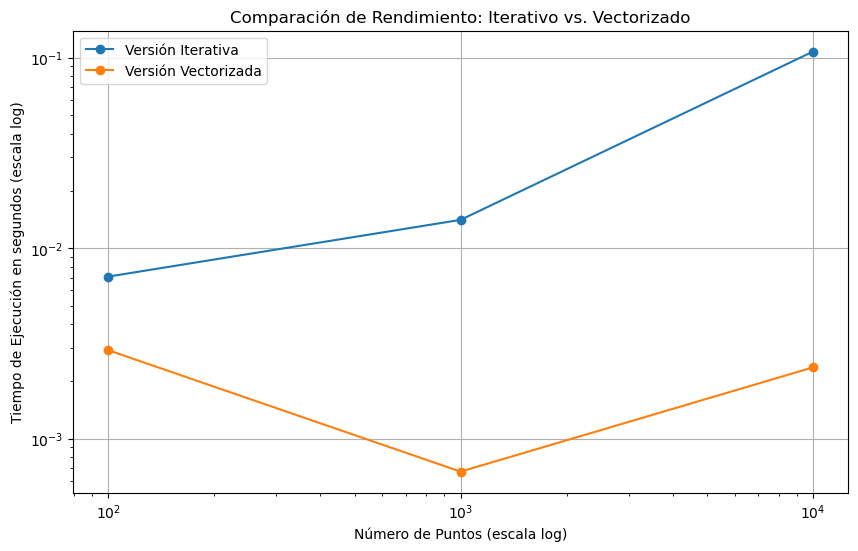

Resultado iterativo: 1.762400
Resultado vectorizado: 1.793200
Resultado real (SciPy): 1.764163
Desviación iterativo: 0.001763
Desviación vectorizado: 0.029037


In [4]:
# Función de prueba: campana de Gauss
def mi_funcion(x):
    return np.exp(-x**2)

# Parámetros de la simulación
a, b = -2, 2
num_puntos_list = [100, 1000, 10000]

# Listas para almacenar tiempos de ejecución
tiempos_iterativos = []
tiempos_vectorizados = []

for num_puntos in num_puntos_list:
    # Medición de tiempo para la versión iterativa
    tiempo_iterativo = timeit.timeit(lambda: integra_iterativa_mc(mi_funcion, a, b, num_puntos), number=5)
    tiempos_iterativos.append(tiempo_iterativo)

    # Medición de tiempo para la versión vectorizada
    tiempo_vectorizado = timeit.timeit(lambda: integra_mc(mi_funcion, a, b, num_puntos), number=5)
    tiempos_vectorizados.append(tiempo_vectorizado)

# Gráfica de rendimiento
plt.figure(figsize=(10, 6))
plt.plot(num_puntos_list, tiempos_iterativos, marker='o', label='Versión Iterativa')
plt.plot(num_puntos_list, tiempos_vectorizados, marker='o', label='Versión Vectorizada')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Número de Puntos (escala log)')
plt.ylabel('Tiempo de Ejecución en segundos (escala log)')
plt.title('Comparación de Rendimiento: Iterativo vs. Vectorizado')
plt.legend()
plt.grid()
plt.show()

# Comparación de resultados con el mayor número de puntos
resultado_iterativo = integra_iterativa_mc(mi_funcion, a, b, num_puntos_list[-1])
resultado_vectorizado = integra_mc(mi_funcion, a, b, num_puntos_list[-1])
resultado_real, _ = quad(mi_funcion, a, b)

# Cálculo de las desviaciones
desviacion_iterativo = abs(resultado_iterativo - resultado_real)
desviacion_vectorizado = abs(resultado_vectorizado - resultado_real)

print(f"Resultado iterativo: {resultado_iterativo:.6f}")
print(f"Resultado vectorizado: {resultado_vectorizado:.6f}")
print(f"Resultado real (SciPy): {resultado_real:.6f}")
print(f"Desviación iterativo: {desviacion_iterativo:.6f}")
print(f"Desviación vectorizado: {desviacion_vectorizado:.6f}")

## Visualización del Método

La siguiente gráfica muestra los puntos aleatorios generados y cómo se distribuyen por encima y por debajo de la función. La proporción de puntos verdes respecto al total es la base para la aproximación de la integral.

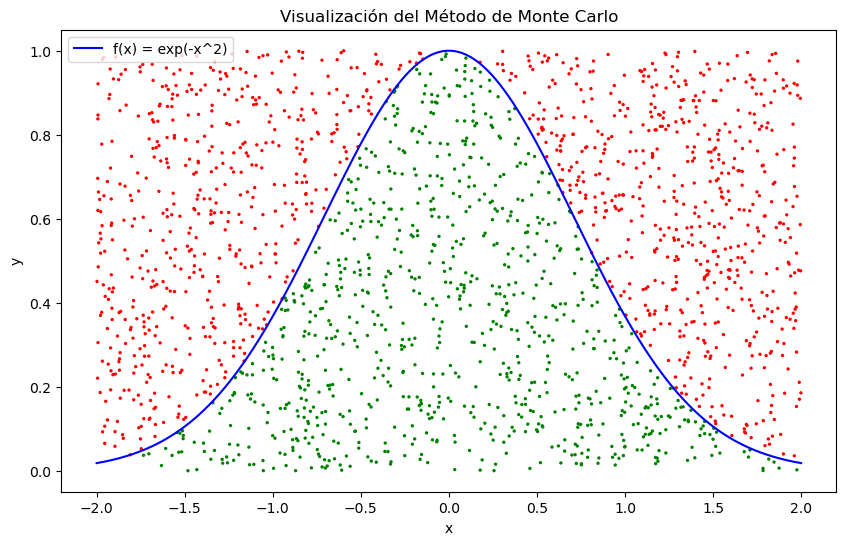

In [5]:
# Gráfica de resultados
plt.figure(figsize=(10, 6))
x = np.linspace(a, b, 10000)
y = mi_funcion(x)
plt.plot(x, y, label='f(x) = exp(-x^2)', color='blue')

# Puntos generados
num_puntos_graf = num_puntos_list[-1]
x_puntos = np.random.uniform(a, b, num_puntos_graf)
y_puntos = np.random.uniform(0, max(y), num_puntos_graf)
colores = np.where(y_puntos < mi_funcion(x_puntos), 'green', 'red')

# Se grafican solo una fracción de los puntos para no saturar la visualización
muestra = 2000
plt.scatter(x_puntos[:muestra], y_puntos[:muestra], color=colores[:muestra], s=2)

plt.title('Visualización del Método de Monte Carlo')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

## Resultados y Conclusión

### Rendimiento

La gráfica de rendimiento compara los tiempos de ejecución de ambas versiones. En la escala logarítmica, se observa que la versión vectorizada es significativamente más eficiente, especialmente a medida que aumenta el número de puntos. Esto demuestra el impacto positivo de la vectorización con NumPy al evitar bucles explícitos en Python.

### Precisión

Ambos métodos ofrecen una aproximación razonable al valor real de la integral. Las desviaciones calculadas son pequeñas, lo que valida la correcta implementación del algoritmo.

### Conclusión Final

Este proyecto demuestra la implementación y evaluación del método de Monte Carlo para la integración numérica. La comparación entre el enfoque iterativo y el vectorizado resalta la superioridad en rendimiento de este último, un principio fundamental en la computación científica con Python y NumPy.